<a href="https://colab.research.google.com/github/SYAMINI-17/FMML_ASSGNIMENT-2024/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

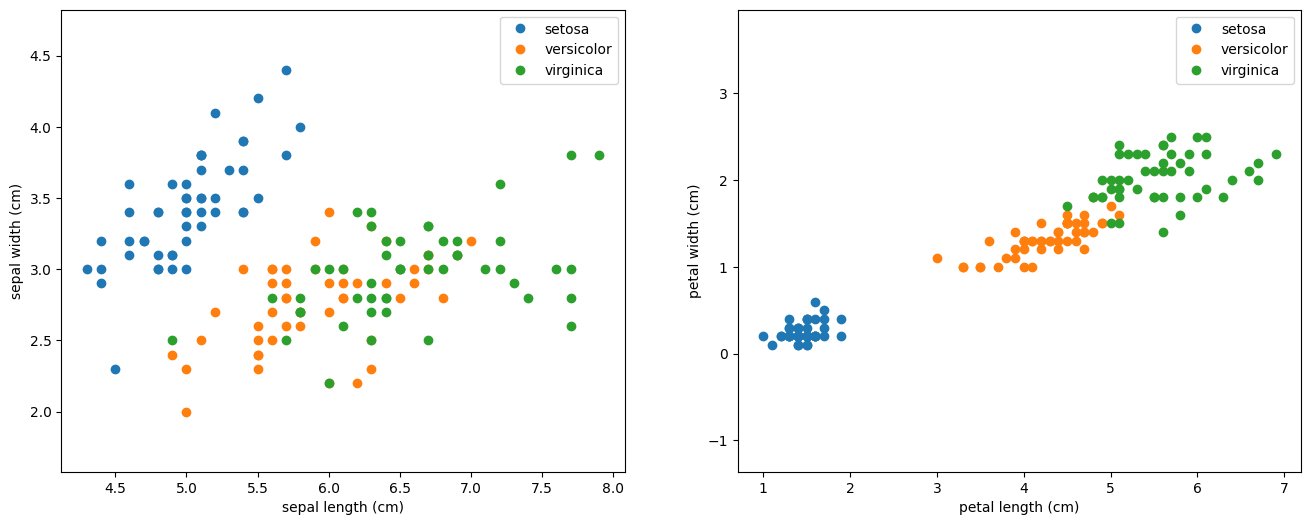

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 103.77it/s]


# Plot training progress

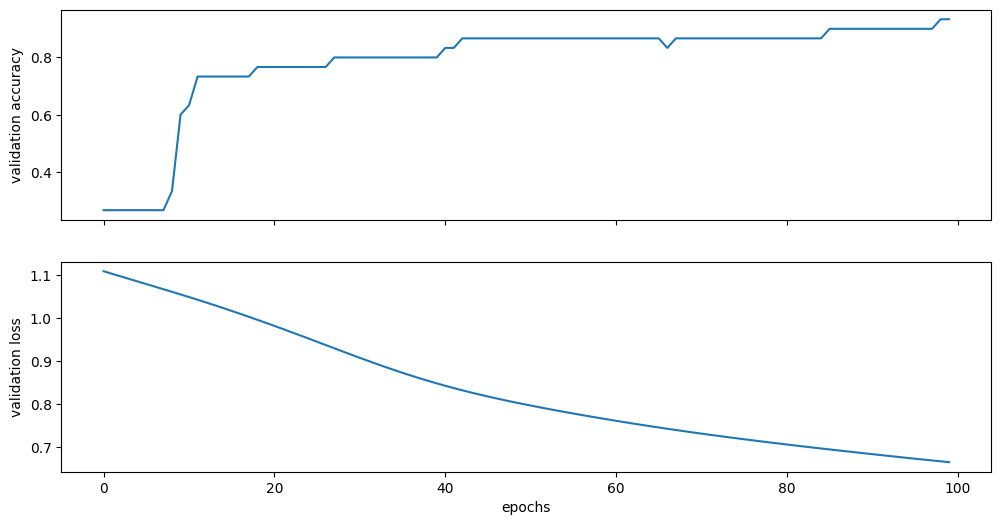

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

Answer 1

Adjusting the number of hidden layers in a neural network can significantly impact its performance. Adding more layers can allow the network to learn more complex patterns in the data, but it may also increase the risk of overfitting, especially if the dataset is small.

If you're experiencing issues with the current model's performance, you could try experimenting with different configurations of hidden layers. You might try increasing the number of layers to capture more intricate relationships in the data or decreasing them to simplify the model and reduce overfitting.

However, it's essential to monitor the performance metrics closely on a validation set to ensure that any changes improve the model's generalization ability and don't lead to overfitting. Additionally, other hyperparameters such as learning rate, batch size, and activation functions should also be considered during the tuning process.

Answer 2

Adjusting the number of neurons in the hidden layers of a neural network can have a significant impact on its performance and capacity to learn from the data. Here's an explanation of how changing the number of neurons in the hidden layers affects the neural network:

Increase in neurons: Adding more neurons to a hidden layer allows the model to learn more complex patterns in the data. With more neurons, the network has the capacity to represent more intricate relationships between the input features and the output. This can potentially lead to better performance on the training data if the added complexity captures relevant patterns.

Decrease in neurons: Conversely, reducing the number of neurons in a hidden layer simplifies the model. This can help prevent overfitting, especially if the network was previously too complex for the given dataset. A simpler model with fewer neurons might generalize better to unseen data, improving performance on validation and test sets.

Finding the optimal number of neurons: The optimal number of neurons in a hidden layer depends on various factors such as the complexity of the problem, the size of the dataset, and the presence of noise or irrelevant features. It often involves experimentation and tuning through techniques like cross-validation to find the balance between model complexity and generalization performance.

Trade-off between capacity and overfitting: Adding more neurons increases the capacity of the model to learn complex relationships in the data, but it also increases the risk of overfitting, where the model memorizes the training data without generalizing well to new data. On the other hand, reducing the number of neurons can help mitigate overfitting but might limit the model's ability to capture complex patterns.

By adjusting the number of neurons in the hidden layers, you can control the model's capacity and potentially improve its performance on the task at hand. However, it's essential to monitor the model's performance on validation and test data to ensure that any changes lead to better generalization and avoid overfitting.

Answer 3

An explanation of how different activation functions can affect the behavior and performance of a neural network:

ReLU (Rectified Linear Unit):

ReLU is one of the most commonly used activation functions due to its simplicity and effectiveness.

It replaces all negative values with zero, effectively introducing non-linearity to the network.

ReLU is computationally efficient and helps mitigate the vanishing gradient problem, allowing for faster convergence during training.

However, ReLU neurons can suffer from the "dying ReLU" problem, where neurons become inactive and output zero for all inputs, leading to dead paths in the network.

Sigmoid:

Sigmoid squashes the output of each neuron to the range [0, 1], making it suitable for binary classification problems where the output needs to be interpreted as probabilities.

However, sigmoid neurons can saturate and cause vanishing gradients, especially in deeper networks, leading to slower convergence and difficulty in training.


Tanh (Hyperbolic Tangent):

Tanh is similar to the sigmoid function but squashes the output to the range [-1, 1], centering the output around zero.

Like sigmoid, tanh is useful for binary classification tasks, but it provides stronger gradients, making it more suitable for deeper networks.

Tanh also suffers from the vanishing gradient problem but to a lesser extent compared to sigmoid.

Other activation functions:

There are many other activation functions available, each with its own characteristics and use cases. Some examples include Leaky ReLU, Parametric ReLU (PReLU), Exponential Linear Unit (ELU), and Swish.

These activation functions aim to address the limitations of traditional functions like ReLU and sigmoid, such as the dying ReLU problem or vanishing gradients, by introducing variations that maintain non-linearity while mitigating these issues.

When choosing an activation function, it's essential to consider the specific characteristics of the problem you're solving, the properties of the data, and the behavior you want the network to exhibit during training. Experimenting with different activation functions can help you find the one that leads to better convergence, generalization, and performance on your task.